In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
# Step1 - 이미지 불러오기
I = cv2.imread('char.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Step2, Step3 - Gaussian Filter 구현, kernel_size는 홀수로 지정할 것
def my_gaussian_filter(image, kernel_size, sigma):
    
    # Gaussian kernel 생성
    t = np.linspace(0, 1, kernel_size)                                        # np.linspace 사용해서 [x, y] 좌표 생성 과정 e.g. t = [0, 1, 2, 3, 4]
    [X, Y] = np.meshgrid(t, np.transpose(t))                                   # np.meshgrid 사용해서 [x, y] 좌표 생성 e.g. X=[-2, -1, 0 , 1, 2], Y = [-2, -1, 0, 1, 2]^t (transposed)
    formula = np.exp((-1)*((X*X)+(Y*Y))/(2*sigma*sigma))                                   # Gaussian Filter 공식 구현
    K = formula /(formula.sum())                                        # K값 구하기
    gaussian_kernel = K * formula                             # K값 x formula 해서 Gaussian kernel 구하기
    
    # convolution Image*kernel
    result = cv2.filter2D(image,-1,gaussian_kernel)                                      # cv2.filter2D 이용해서 convolution
 
    return result

In [4]:
# Step 3 - OpenCV의 Gaussian Filter 사용
gaussian_filter_opencv_5_10 = cv2.GaussianBlur(I,(5,5),10)                              # cv2.GaussianBlur 사용해서 OpenCV의 Gaussian Filter 사용해보기
gaussian_filter_opencv_11_10 = cv2.GaussianBlur( I,(11,11),10)                              # Kernel size는 반드시 홀수로 지정할 것

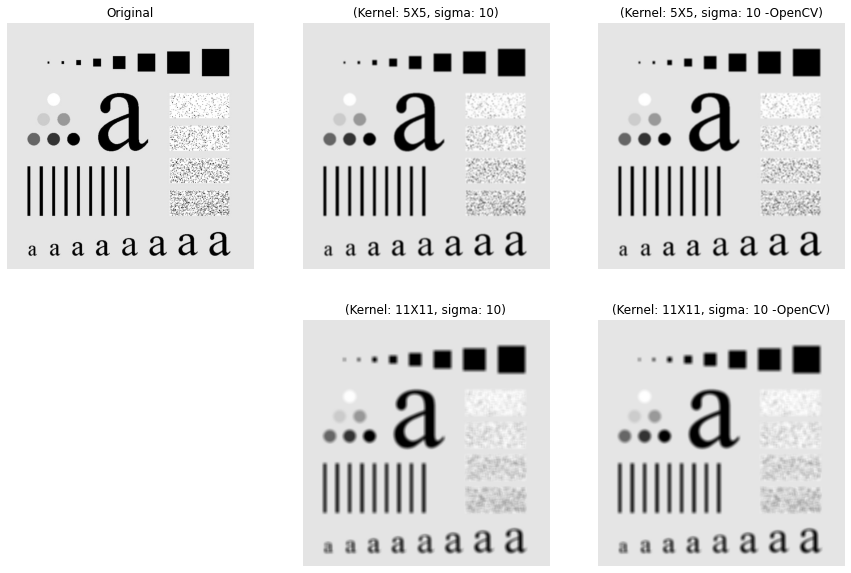

In [13]:
# Step 4 - 출력하기
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

## plotting 하는 부분은 1주차 과제를 참조하여 스스로 채워 넣으세요.
Intensity_level = [ 256, 32, 16, 8, 4, 2]
step = [ np.rint(255 / (i - 1)) for i in Intensity_level ]

result_1 = np.rint(I / step[0]) *step[0]  
result_1 = result_1.astype('uint8')   
ax1 = fig.add_subplot(rows,cols,1)
result_1_RGB = cv2.cvtColor(result_1, cv2.COLOR_GRAY2RGB)      
ax1.imshow(result_1_RGB)
ax1.set_title('Original')
ax1.axis("off")

result_2 = np.rint(my_gaussian_filter(I,5,10) / step[0]) *step[0]  
result_2 = result_2.astype('uint8') 
ax2 = fig.add_subplot(rows,cols,2)
result_2_RGB = cv2.cvtColor(result_2, cv2.COLOR_GRAY2RGB)      
ax2.imshow(result_2_RGB)
ax2.set_title('(Kernel: 5X5, sigma: 10)')
ax2.axis("off")

result_3 = np.rint(gaussian_filter_opencv_5_10 / step[0]) *step[0]  
result_3 = result_3.astype('uint8') 
ax3 = fig.add_subplot(rows,cols,3)
result_3_RGB = cv2.cvtColor(result_3, cv2.COLOR_GRAY2RGB)      
plt.imshow(result_3_RGB)
ax3.set_title('(Kernel: 5X5, sigma: 10 -OpenCV)')
ax3.axis("off")

result_4 = np.rint(my_gaussian_filter(I,11,10) / step[0]) *step[0]  
result_4 = result_4.astype('uint8') 
ax4 = fig.add_subplot(rows,cols,5)
result_4_RGB = cv2.cvtColor(result_4, cv2.COLOR_GRAY2RGB)      
plt.imshow(result_4_RGB)
ax4.set_title('(Kernel: 11X11, sigma: 10)')
ax4.axis("off")

result_5 = np.rint(gaussian_filter_opencv_11_10 / step[0]) *step[0]  
result_5 = result_5.astype('uint8') 
ax5 = fig.add_subplot(rows,cols,6)
result_5_RGB = cv2.cvtColor(result_5, cv2.COLOR_GRAY2RGB)      
plt.imshow(result_5_RGB)
ax5.set_title('(Kernel: 11X11, sigma: 10 -OpenCV)')
ax5.axis("off")

plt.show()